## Project Scoping

Goals for project (initial):
Check whether there is a link between GDP and Life Expectancy at Birth per Country per Year. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


all_data = pd.read_csv('all_data.csv')
all_data2 = pd.read_csv('all_data_rev2.csv')
print(all_data)
print(all_data2)



     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]
     Country  Year  Life expectancy at birth (years)           GDP        pop  \
0      Chile  2000                              77.3  7.786093e+10  15.300000   
1      Chil

## Explore and Explain Data

You can start to build graphs from the data by first importing Matplotlib or seaborn and then making some plots!

Some components that you may want to include:

>Has life expectancy increased over time in the six nations?

>Has GDP increased over time in the six nations?

>Is there a correlation between GDP and life expectancy of a country?

>What is the average life expectancy in these nations?

>What is the distribution of that life expectancy?

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


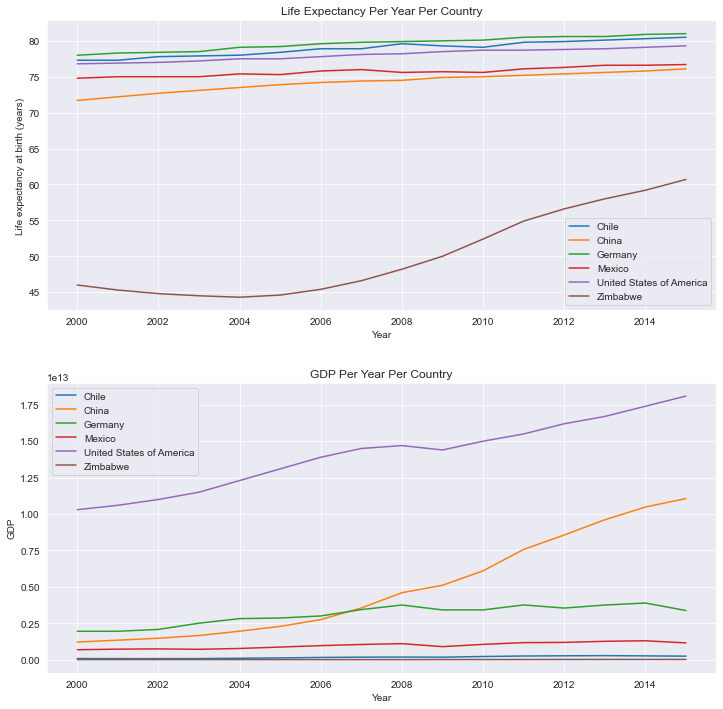

In [3]:
# Create list of the Countries in the all_data file

country_list = all_data.Country.unique()
print(country_list)

sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.25)
plt.subplot(2,1,1)

for country in country_list:
    country_data = all_data[all_data['Country']==country]
    sns.lineplot(data=country_data, x='Year',y='Life expectancy at birth (years)')
    
plt.title('Life Expectancy Per Year Per Country')
plt.legend(country_list)

plt.subplot(2,1,2)
for country in country_list:
    country_data = all_data[all_data['Country']==country]
    sns.lineplot(data=country_data, x='Year', y='GDP')
    
plt.title('GDP Per Year Per Country')
plt.legend(country_list)
plt.savefig('life-gdp_per_country_per_year')
plt.show()


# Note: See below for revised plots to account for Per Capita GDP

In [4]:
# Observations: 

    # Life expectancy at birth has increased over time for all six nations, most dramatically for Zimbabwe.
        # Note showing Zimbabwe separately since its data plots as an outlier compared to the other data. 
    # GDP has significantly increased over time for the US and for China. GDP appears to have slightly(?) decreased for Germany
        # and remained flat for the remaining nations, including Zimbabwe. The leads to an initial hypothesis that there is not
        # a strong correlation between GDP and life expectancy. INITIAL hypothesis may be wrong. See next

<Figure size 432x288 with 0 Axes>

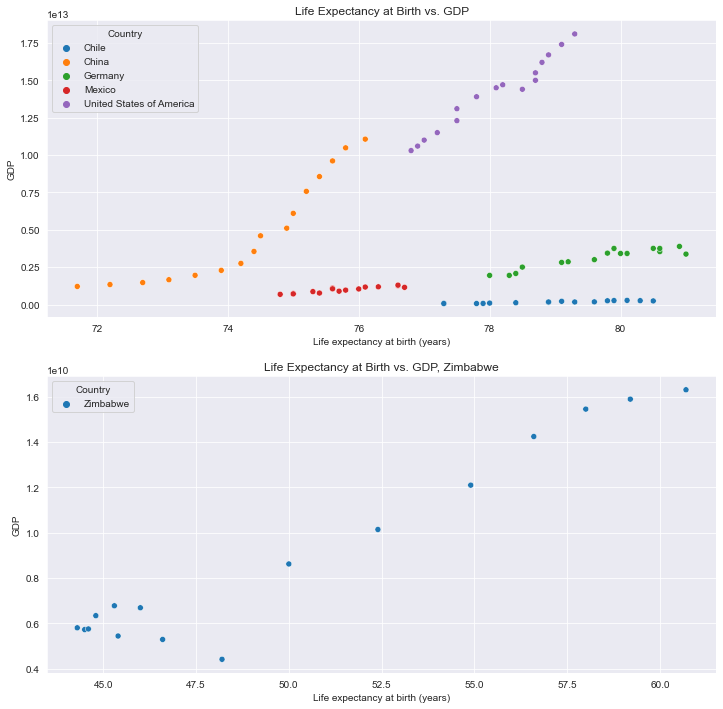

In [5]:
plt.clf()

sns.set_style('darkgrid')
zim_data = all_data[all_data['Country']=='Zimbabwe']
rest_data = all_data[all_data['Country']!='Zimbabwe']
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.scatterplot(data=rest_data, x='Life expectancy at birth (years)', y='GDP', hue='Country')
plt.title('Life Expectancy at Birth vs. GDP')
plt.subplot(2,1,2)
sns.scatterplot(data=zim_data, x='Life expectancy at birth (years)', y='GDP', hue='Country')
plt.title('Life Expectancy at Birth vs. GDP, Zimbabwe')
plt.savefig('life_vs_gdp.png')
plt.show()

In [6]:
# Observations (cont)
    # Per the above plots, it does appear that there is a correlation between an increase in GDP and an increase in 
        # life expectancy at birth.
    # The comment suggesting to provide a component answer to the question "What is the average life expectancy in these
        # nations?" is unclear/ does not seem to be helpful. Would this be an average of (for example) Chile's life expectancy
        # over the years 2000-2015? Of what value is this data? The data for 'Chile, 2015' >>> IS <<< the average life 
        # expectancy. Or is the suggestion to average all nations' life expectancy data in 2015? Again,this is meaningless 
        # since we are not provided populations of each country, i.e. China and US data will be undervalued since their
        # populations are substantially larger.
    # Unclear what 'distribution of that life expectancy' is refering to...

## Conclusions
Finally we can wrap up the project. You can write a conclusion about your process and findings.

Main components that you will want to include:

What did you learn throughout the process?
Are the results what you expected?
What are the key findings and takeaways?

In [7]:
# Learned that there is a correlation between GDP and life expectancy. This finding is not too surprising, and it leads to more
# questions and desire for more information such as populations so that GDP can be converted to a per capita- China and the US 
# should have a larger GDP because they have larger populations. 

# Below population data imported from UN: "United Nations, Department of Economic and Social Affairs, Population Division
# (2019). World Population Prospects 2019, Online Edition. Rev. 1." Total population was divided into GDP to give per capita GDP

In [8]:
all_data_UN = pd.read_csv('un_data.csv')
# all_data_chile = all_data_UN[all_data_UN['Country']=='Chile']
# print(all_data_chile)

all_data_merge = pd.merge(all_data, all_data_UN, how = 'outer')
all_data_merge['GDP_pc'] = (all_data_merge['GDP'])/((all_data_merge['Pop']*1000))
print(all_data_merge.head(50))


    Country  Year  Life expectancy at birth (years)           GDP         Pop  \
0     Chile  2000                              77.3  7.786093e+10    15342.35   
1     Chile  2001                              77.3  7.097992e+10    15516.11   
2     Chile  2002                              77.8  6.973681e+10    15684.41   
3     Chile  2003                              77.9  7.564346e+10    15849.65   
4     Chile  2004                              78.0  9.921039e+10    16014.97   
5     Chile  2005                              78.4  1.229650e+11    16182.71   
6     Chile  2006                              78.9  1.547880e+11    16354.51   
7     Chile  2007                              78.9  1.736060e+11    16530.20   
8     Chile  2008                              79.6  1.796380e+11    16708.26   
9     Chile  2009                              79.3  1.723890e+11    16886.18   
10    Chile  2010                              79.1  2.185380e+11    17062.53   
11    Chile  2011           

<Figure size 432x288 with 0 Axes>

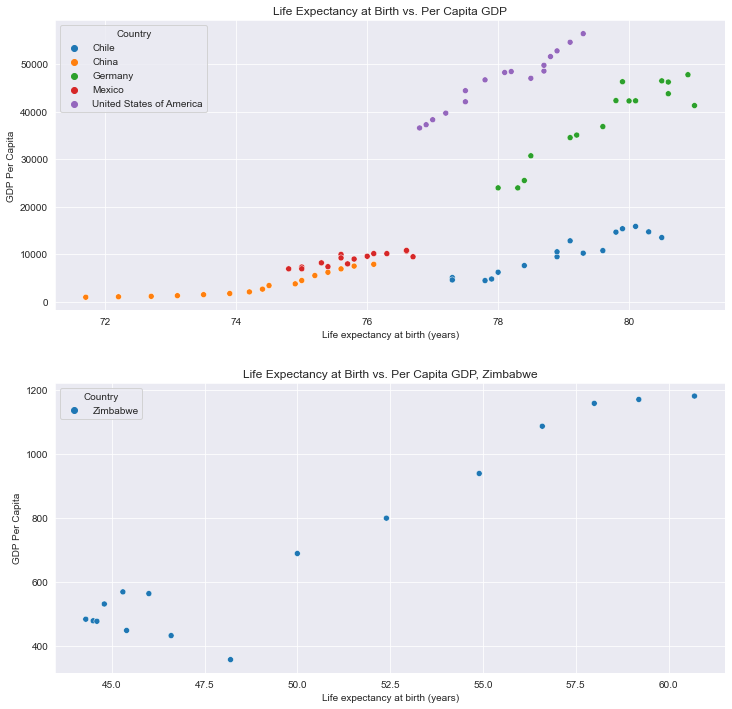

In [9]:
plt.clf()

sns.set_style('darkgrid')
zim_data2 = all_data_merge[all_data_merge['Country']=='Zimbabwe']
rest_data2 = all_data_merge[all_data_merge['Country']!='Zimbabwe']
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.25)
plt.subplot(2,1,1)
sns.scatterplot(data=rest_data2, x='Life expectancy at birth (years)', y='GDP_pc', hue='Country')
plt.title('Life Expectancy at Birth vs. Per Capita GDP')
plt.ylabel('GDP Per Capita')

plt.subplot(2,1,2)
sns.scatterplot(data=zim_data2, x='Life expectancy at birth (years)', y='GDP_pc', hue='Country')
plt.title('Life Expectancy at Birth vs. Per Capita GDP, Zimbabwe')
plt.ylabel('GDP Per Capita')
plt.savefig('life_vs_gdp-pc.png')
plt.show()

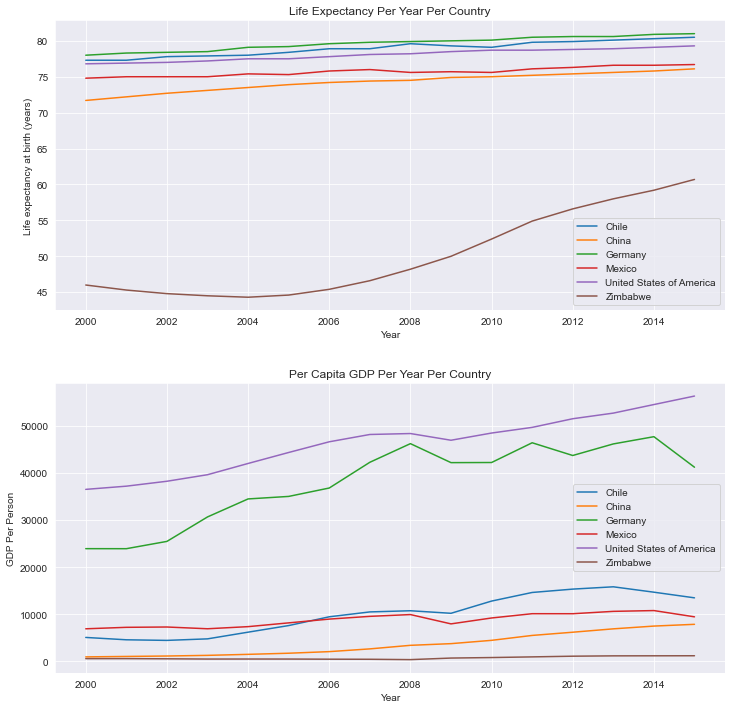

In [14]:
# Conclusions are similar as far as increase in GDP leading to increase in life expectancy, however adjusting GDP
# for population shows Mexico performing better than China, and Germany with a near equivalent per capita GDP
# but longer life expectancy than the US. Chile is outperforming all countries on life expectancy to per capita GDP, which
# would seem to say that maximizing GDP does not maximize life expectancy by itself.



sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=.25)
plt.subplot(2,1,1)

for country in country_list:
    country_data = all_data[all_data['Country']==country]
    sns.lineplot(data=country_data, x='Year',y='Life expectancy at birth (years)')
    
plt.title('Life Expectancy Per Year Per Country')
plt.legend(country_list)

plt.subplot(2,1,2)
for country in country_list:
    country_data = all_data_merge[all_data_merge['Country']==country]
    sns.lineplot(data=country_data, x='Year', y='GDP_pc')
    
plt.title('Per Capita GDP Per Year Per Country')
plt.ylabel('GDP Per Person')
plt.legend(country_list)
plt.savefig('life-gdp_pc_per_country_per_year')
plt.show()

